# Importing relevant Libraries and adjusting display settings

In [96]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
# To display all results of a single cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
# Setting display options

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

# Importing relevant datasets

In [5]:
churn_data = pd.read_csv(r'C:\Users\DA1041TU\Downloads\churn_data.csv')

In [6]:
customer_data = pd.read_csv(r'C:\Users\DA1041TU\Downloads\customer_data.csv')

In [7]:
internet_data = pd.read_csv(r'C:\Users\DA1041TU\Downloads\internet_data.csv')

In [8]:
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [10]:
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


- **Combining all dataframes into one**

In [11]:
df_1 = pd.merge(churn_data,customer_data,on='customerID')

In [12]:
telecom = pd.merge(df_1,internet_data,on='customerID')

In [14]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [15]:
telecom.shape

(7043, 21)

In [16]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [17]:
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


# Data Preparation

- **converting some binary variables to 0/1**

In [18]:
# List of variables to map
varlist = ['PhoneService','PaperlessBilling','Churn','Partner','Dependents']


# Defining map function
def binary_map(x):
    return x.map({'Yes':1,'No':0})


# Applying the map function
telecom[varlist] = telecom[varlist].apply(binary_map)

In [19]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No


### For categorical variables with multiple levels, create dummy features(One hot encode)

In [20]:
# Creating dummy1 variable for some categorical variables

dummy1 = pd.get_dummies(telecom[['Contract','PaymentMethod','gender','InternetService']], drop_first=True)

# Adding results to main dataframe

telecom = pd.concat([telecom,dummy1],axis=1)

In [21]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No,1,0,0,0,1,1,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No,0,0,0,0,1,1,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,1,0,0,0,0,1,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No,0,0,0,1,0,0,1,0


In [22]:
# Creating dummy2 variable for some categorical variables

dummy2 = pd.get_dummies(telecom[['MultipleLines','OnlineSecurity','OnlineBackup','TechSupport','StreamingTV','StreamingMovies','DeviceProtection']])

# Adding results to main dataframe

telecom = pd.concat([telecom,dummy2],axis=1)

In [23]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No,1,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


### Drop repeated variables

In [24]:
telecom.drop(labels=['Contract','PaymentMethod','gender','InternetService','MultipleLines','OnlineSecurity','OnlineBackup',
                     'TechSupport','StreamingTV','StreamingMovies', 'DeviceProtection'], axis=1,inplace=True)

In [25]:
telecom.columns

Index(['customerID', 'tenure', 'PhoneService', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'SeniorCitizen', 'Partner',
       'Dependents', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'TechSupport_No', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_No internet service',
       'StreamingTV_Yes', 'StreamingMovies_No',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'Devic

In [26]:
telecom.drop(labels=['MultipleLines_No phone service','OnlineSecurity_No internet service','OnlineBackup_No internet service',
                    'TechSupport_No internet service','StreamingTV_No internet service','StreamingMovies_No internet service',
                    'DeviceProtection_No internet service'],axis=1,inplace=True)

In [27]:
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,DeviceProtection_No,DeviceProtection_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,1
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [28]:
telecom.shape

(7043, 32)

In [29]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7043 non-null   object 
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

In [30]:
# Converting TotalCharges from object to numeric data type

telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'],errors='coerce')

In [31]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

### Check for outliers

In [32]:
telecom.columns

Index(['customerID', 'tenure', 'PhoneService', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'SeniorCitizen', 'Partner',
       'Dependents', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_No', 'MultipleLines_Yes', 'OnlineSecurity_No',
       'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes',
       'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes',
       'DeviceProtection_No', 'DeviceProtection_Yes'],
      dtype='object')

In [33]:
# Checking for outliers in the continuous variables

num_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [34]:
# Checking for outliers at 25%, 50%, 75%, 90%, 95%, 99%

num_telecom.describe(percentiles=[0.25,0.50,0.75,0.90,0.95,0.99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


In [35]:
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

In [36]:
telecom.isnull().sum()/len(telecom.index)

customerID                               0.000000
tenure                                   0.000000
PhoneService                             0.000000
PaperlessBilling                         0.000000
MonthlyCharges                           0.000000
TotalCharges                             0.001562
Churn                                    0.000000
SeniorCitizen                            0.000000
Partner                                  0.000000
Dependents                               0.000000
Contract_One year                        0.000000
Contract_Two year                        0.000000
PaymentMethod_Credit card (automatic)    0.000000
PaymentMethod_Electronic check           0.000000
PaymentMethod_Mailed check               0.000000
gender_Male                              0.000000
InternetService_Fiber optic              0.000000
InternetService_No                       0.000000
MultipleLines_No                         0.000000
MultipleLines_Yes                        0.000000


In [37]:
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [38]:
telecom.isnull().sum()/len(telecom.index)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

# Train Test split

In [97]:
from sklearn.model_selection import train_test_split

In [116]:
# Creating X and y sets

X = telecom.drop(['Churn','customerID'],axis=1)
y = telecom['Churn']

In [117]:
X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,DeviceProtection_No,DeviceProtection_Yes
0,1,0,1,29.85,29.85,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1
2,2,1,1,53.85,108.15,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,1
4,2,1,1,70.70,151.65,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [118]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [119]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=100)

In [120]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4922, 30), (2110, 30), (4922,), (2110,))

# Feature scaling

In [121]:
from sklearn.preprocessing import StandardScaler

In [122]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [123]:
scaler = StandardScaler()

In [124]:
scale_vars = ['tenure','MonthlyCharges','TotalCharges']

X_train_scaled[scale_vars] = scaler.fit_transform(X_train_scaled[scale_vars])

In [125]:
X_train_scaled.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,DeviceProtection_No,DeviceProtection_Yes
879,0.019693,1,1,-0.338074,-0.276449,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0
5790,0.305384,0,1,-0.464443,-0.112702,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0
6498,-1.286319,1,1,0.581425,-0.974430,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1
880,-0.919003,1,1,1.505913,-0.550676,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1
2784,-1.163880,1,1,1.106854,-0.835971,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1


In [126]:
# Checking churn rate

churn = sum(telecom['Churn'])/len(telecom['Churn'].index)
churn

0.26578498293515357

# Looking at correlation

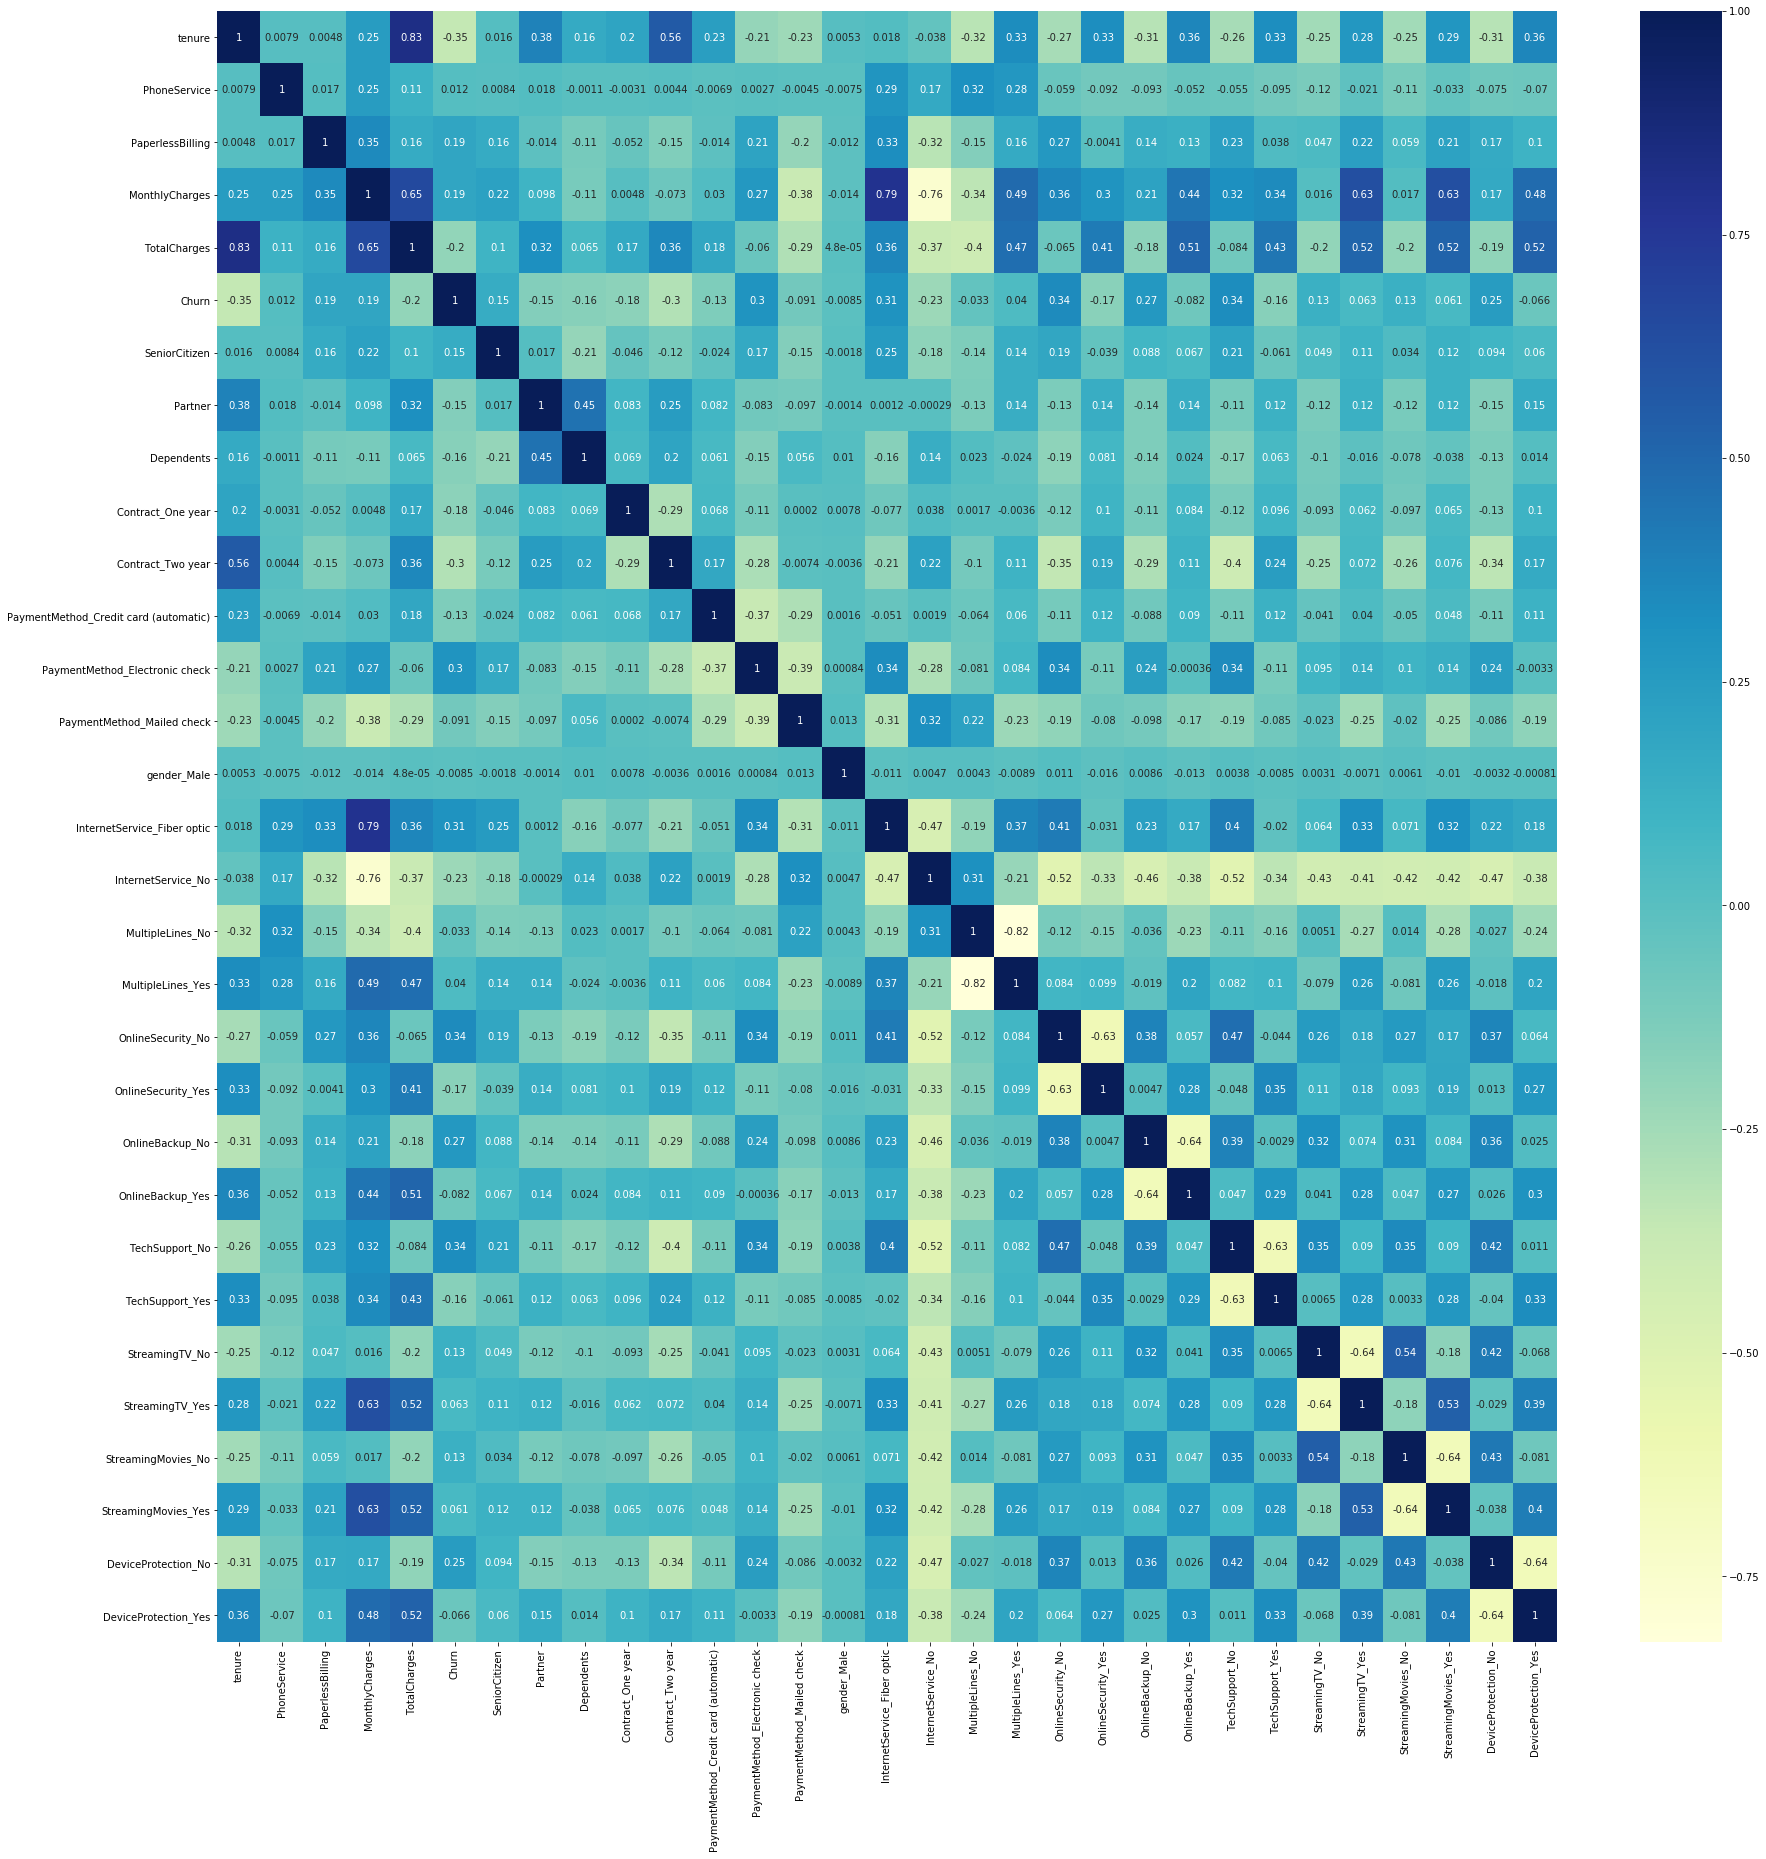

In [51]:
plt.figure(figsize=(30,30))

sb.heatmap(telecom.corr(), annot=True, cmap='YlGnBu')
plt.show();

# Drop highly correlated dummy variables

In [52]:
X_train_scaled.columns

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'SeniorCitizen', 'Partner', 'Dependents',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_No', 'MultipleLines_Yes', 'OnlineSecurity_No',
       'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes',
       'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes',
       'DeviceProtection_No', 'DeviceProtection_Yes'],
      dtype='object')

In [127]:
X_test_scaled = X_test_scaled.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No',
                              'TechSupport_No','StreamingTV_No','StreamingMovies_No'],axis=1)

X_train_scaled = X_train_scaled.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No',
                              'TechSupport_No','StreamingTV_No','StreamingMovies_No'],axis=1)

# Checking correlation after dropping highly correlated variables

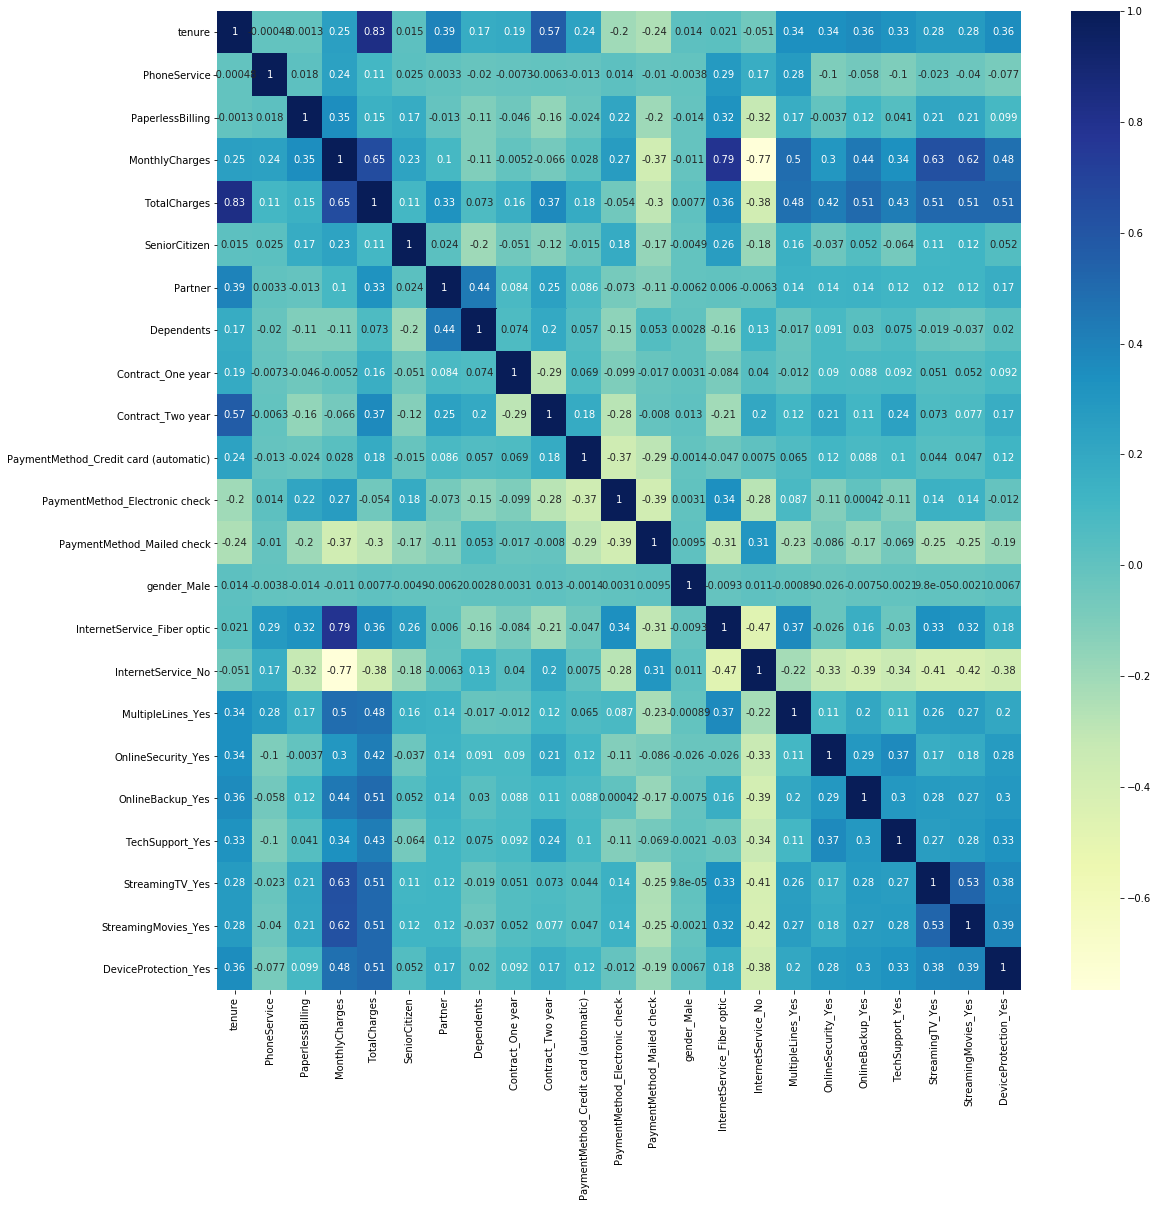

In [54]:
plt.figure(figsize=(18,18))

sb.heatmap(X_train_scaled.corr(), annot=True, cmap='YlGnBu')
plt.show();

## Running 1st Training model

In [128]:
import statsmodels.api as sm

In [129]:
# Logistice regression model

log_ml = sm.GLM(y_train,(sm.add_constant(X_train_scaled)), family=sm.families.Binomial())
print(log_ml.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Mon, 27 Jul 2020   Deviance:                       4009.4
Time:                        21:05:07   Pearson chi2:                 6.07e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

# Feature selection using RFE

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [131]:
logreg = LogisticRegression()

In [132]:
rfe = RFE(logreg,15)
rfe = rfe.fit(X_train_scaled,y_train)

In [133]:
rfe.support_

array([ True, False,  True,  True,  True,  True, False, False,  True,
        True,  True, False,  True, False,  True,  True,  True, False,
       False,  True,  True,  True, False])

In [134]:
features = list(zip(X_train_scaled.columns,rfe.support_,rfe.ranking_))
features = pd.DataFrame(features, columns=['Feature', 'Support','Ranking'])
features = features.sort_values(by=['Support','Ranking'],ascending=[False,True])
features

,Feature,Support,Ranking
0,tenure,True,1
2,PaperlessBilling,True,1
3,MonthlyCharges,True,1
4,TotalCharges,True,1
5,SeniorCitizen,True,1
8,Contract_One year,True,1
9,Contract_Two year,True,1
10,PaymentMethod_Credit card (automatic),True,1
12,PaymentMethod_Mailed check,True,1
14,InternetService_Fiber optic,True,1


In [135]:
features_15 = features.nlargest(15,columns=['Support'])
col = features_15.Feature
X_train_scaled[col].head()

,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
879,0.019693,1,-0.338074,-0.276449,0,0,0,0,0,0,0,1,0,0,0
5790,0.305384,1,-0.464443,-0.112702,0,0,0,0,0,0,0,0,0,1,1
6498,-1.286319,1,0.581425,-0.974430,0,0,0,0,0,1,0,0,0,0,0
880,-0.919003,1,1.505913,-0.550676,0,0,0,0,0,1,0,0,1,1,1
2784,-1.163880,1,1.106854,-0.835971,0,0,0,0,0,1,0,0,1,1,1


## Assessing the model with Statsmodels

In [136]:
X_train_scaled_sm = sm.add_constant(X_train_scaled[col])

log_ml = sm.GLM(y_train,X_train_scaled_sm, family=sm.families.Binomial())

log_ml = log_ml.fit()
print(log_ml.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2011.1
Date:                Mon, 27 Jul 2020   Deviance:                       4022.2
Time:                        21:05:15   Pearson chi2:                 6.25e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [137]:
# Getting prediction on train set

y_train_pred = log_ml.predict(X_train_scaled_sm)
y_train_pred[:10]

879     0.192642
5790    0.275624
6498    0.599507
880     0.513571
2784    0.648233
3874    0.414846
5387    0.431184
6623    0.801788
4465    0.228194
5364    0.504575
dtype: float64

In [138]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19264205, 0.27562384, 0.59950707, 0.51357126, 0.64823272,
       0.41484553, 0.43118361, 0.80178789, 0.22819404, 0.50457542])

## Creating a dataframe actual churn flag and the predicted probabilities

In [139]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_prob,CustID
0,0,0.192642,879
1,0,0.275624,5790
2,1,0.599507,6498
3,1,0.513571,880
4,1,0.648233,2784


## Creating new column 'Predicted' with 1 if Prob>0.50 else 0

In [140]:
y_train_pred_final['Predicted'] = y_train_pred_final.Churn_prob.map(lambda x: 1 if x>0.30 else 0)
y_train_pred_final.head()

,Churn,Churn_prob,CustID,Predicted
0,0,0.192642,879,0
1,0,0.275624,5790,0
2,1,0.599507,6498,1
3,1,0.513571,880,1
4,1,0.648233,2784,1


In [141]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [142]:
CM = confusion_matrix(y_train_pred_final['Churn'], y_train_pred_final['Predicted'])

In [143]:
print(CM)

[[2796  839]
 [ 287 1000]]


In [144]:
(3275+713)/np.sum(CM)

0.8102397399431126

In [145]:
print(classification_report(y_train_pred_final['Churn'], y_train_pred_final['Predicted']))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83      3635
           1       0.54      0.78      0.64      1287

    accuracy                           0.77      4922
   macro avg       0.73      0.77      0.74      4922
weighted avg       0.81      0.77      0.78      4922



In [146]:
accuracy_score(y_train_pred_final['Churn'], y_train_pred_final['Predicted'])

0.7712312068264933

# Checking VIF

In [147]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [148]:
vif = pd.DataFrame()
vif['Features'] = X_train_scaled.columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled.values,i) for i in range(X_train_scaled.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
3,MonthlyCharges,17.81
4,TotalCharges,10.88
1,PhoneService,10.30
14,InternetService_Fiber optic,7.66
0,tenure,7.63
15,InternetService_No,6.91
9,Contract_Two year,3.50
20,StreamingTV_Yes,3.02
21,StreamingMovies_Yes,3.01
2,PaperlessBilling,2.96


In [149]:
X_train_scaled = X_train_scaled[col].drop('MonthlyCharges',axis=1)

In [150]:
X_train_scaled_sm = sm.add_constant(X_train_scaled)

log_ml = sm.GLM(y_train,X_train_scaled_sm, family=sm.families.Binomial())

log_ml = log_ml.fit()
print(log_ml.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2023.1
Date:                Mon, 27 Jul 2020   Deviance:                       4046.2
Time:                        21:07:06   Pearson chi2:                 5.80e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [151]:
y_train_pred = log_ml.predict(X_train_scaled_sm).values.reshape(-1)
y_train_pred[:10]

array([0.22790197, 0.22864388, 0.67489226, 0.61586836, 0.66226032,
       0.41819928, 0.28813321, 0.7951366 , 0.17433167, 0.51908788])

In [152]:
y_train_pred_final['Churn_prob'] = y_train_pred

In [153]:
# Creating new column 'Predicted' with 1 if Prob>0.50 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.Churn_prob.map(lambda x: 1 if x>0.50 else 0)
y_train_pred_final.head()

,Churn,Churn_prob,CustID,Predicted
0,0,0.227902,879,0
1,0,0.228644,5790,0
2,1,0.674892,6498,1
3,1,0.615868,880,1
4,1,0.662260,2784,1


In [154]:
accuracy_score(y_train_pred_final['Churn'], y_train_pred_final['Predicted'])

0.8057700121901666

In [155]:
vif = pd.DataFrame()
vif['Features'] = X_train_scaled.columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled.values,i) for i in range(X_train_scaled.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
2,TotalCharges,7.46
0,tenure,6.90
5,Contract_Two year,3.07
8,InternetService_Fiber optic,2.96
13,StreamingMovies_Yes,2.62
12,StreamingTV_Yes,2.59
1,PaperlessBilling,2.55
9,InternetService_No,2.44
10,MultipleLines_Yes,2.27
11,TechSupport_Yes,1.95


In [156]:
X_train_scaled = X_train_scaled.drop('TotalCharges',axis=1)

In [157]:
X_train_scaled_sm = sm.add_constant(X_train_scaled)

log_ml = sm.GLM(y_train,X_train_scaled_sm, family=sm.families.Binomial())

log_ml = log_ml.fit()
print(log_ml.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2025.9
Date:                Mon, 27 Jul 2020   Deviance:                       4051.9
Time:                        21:07:21   Pearson chi2:                 5.25e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [158]:
y_train_pred = log_ml.predict(X_train_scaled_sm).values.reshape(-1)
y_train_pred[:10]

array([0.24581699, 0.26536078, 0.66940978, 0.63097033, 0.68291606,
       0.39952622, 0.27582791, 0.79816753, 0.19878625, 0.52911878])

In [159]:
y_train_pred_final['Churn_prob'] = y_train_pred

In [160]:
# Creating new column 'Predicted' with 1 if Prob>0.30 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.Churn_prob.map(lambda x: 1 if x>0.30 else 0)
y_train_pred_final.head()

,Churn,Churn_prob,CustID,Predicted
0,0,0.245817,879,0
1,0,0.265361,5790,0
2,1,0.669410,6498,1
3,1,0.630970,880,1
4,1,0.682916,2784,1


In [161]:
accuracy_score(y_train_pred_final['Churn'], y_train_pred_final['Predicted'])

0.7700121901665989

In [162]:
vif = pd.DataFrame()
vif['Features'] = X_train_scaled.columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled.values,i) for i in range(X_train_scaled.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
4,Contract_Two year,2.98
7,InternetService_Fiber optic,2.67
12,StreamingMovies_Yes,2.54
11,StreamingTV_Yes,2.51
1,PaperlessBilling,2.45
9,MultipleLines_Yes,2.24
0,tenure,2.04
8,InternetService_No,2.03
10,TechSupport_Yes,1.92
3,Contract_One year,1.78


In [176]:
cm = confusion_matrix(y_train_pred_final['Churn'], y_train_pred_final['Predicted'])
cm

array([[2791,  844],
       [ 288,  999]], dtype=int64)

In [164]:
print(classification_report(y_train_pred_final['Churn'], y_train_pred_final['Predicted']))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83      3635
           1       0.54      0.78      0.64      1287

    accuracy                           0.77      4922
   macro avg       0.72      0.77      0.73      4922
weighted avg       0.81      0.77      0.78      4922



In [173]:
specificity = 2791/(844+2791)   #   TN/(TN + FP)
specificity

0.7678129298486933

In [175]:
sensitivity = 999/(288+999)   #   TP/(TP + FN)
sensitivity

0.7762237762237763

In [167]:
# Positive predictive value

690/(690+357)

0.6590257879656161

In [168]:
# Negative predictive value

3278/(3278+597)

0.8459354838709677

# Plotting ROC Curve

In [169]:
def draw_curve(actual, probs):
    fpr,tpr,thresholds = roc_curve(actual, probs, drop_intermediate=False)
    auc_score = roc_auc_score(actual, probs)
#     plt.style.use('fivethirtyeight')
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label = 'ROC Curve (area = %0.2f)' % auc_score)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()
    return None

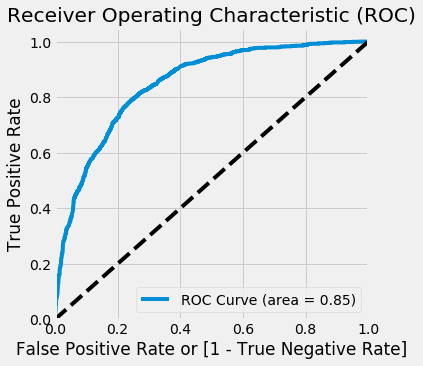

In [170]:
draw_curve(y_train_pred_final['Churn'], y_train_pred_final['Churn_prob'])

# Finding optimal cutoff point

In [107]:
nums = [x/10 for x in range(10)]

In [110]:
for i in nums:
    y_train_pred_final[i] = y_train_pred_final.Churn_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_prob,CustID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.245817,879,0,1,1,1,0,0,0,0,0,0,0
1,0,0.265361,5790,0,1,1,1,0,0,0,0,0,0,0
2,1,0.669410,6498,1,1,1,1,1,1,1,1,0,0,0
3,1,0.630970,880,1,1,1,1,1,1,1,1,0,0,0
4,1,0.682916,2784,1,1,1,1,1,1,1,1,0,0,0


In [111]:
cutoff_df = pd.DataFrame(columns=['prob','accuracy','sensi','speci'])

num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for i in num:
    cm1 = confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0] + cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0] + cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0] + cm1[1,1])
    cutoff_df.loc[i] = [i, accuracy, sensi, speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.261479  1.000000  0.000000
0.1   0.1  0.614994  0.943279  0.498762
0.2   0.2  0.721861  0.846154  0.677854
0.3   0.3  0.770012  0.776224  0.767813
0.4   0.4  0.790532  0.636364  0.845117
0.5   0.5  0.806176  0.536131  0.901788
0.6   0.6  0.798050  0.380730  0.945805
0.7   0.7  0.776310  0.196581  0.981568
0.8   0.8  0.747867  0.041181  0.998074
0.9   0.9  0.738521  0.000000  1.000000


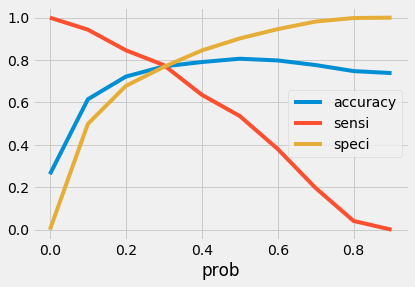

In [113]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show();

In [177]:
precision = cm[1,1]/(cm[0,1] + cm[1,1])
precision

0.5420510037981552

In [178]:
recall = cm[1,1]/(cm[1,0] + cm[1,1])
recall

0.7762237762237763

In [179]:
from sklearn.metrics import precision_score, recall_score

In [180]:
precision_score(y_train_pred_final['Churn'], y_train_pred_final['Predicted'])

0.5420510037981552

In [181]:
recall_score(y_train_pred_final['Churn'], y_train_pred_final['Predicted'])

0.7762237762237763

In [182]:
from sklearn.metrics import precision_recall_curve

In [207]:
y_train_pred_final.Churn, y_train_pred_final.Churn_prob;

In [184]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_prob)

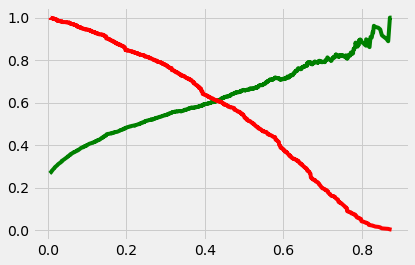

In [185]:
plt.plot(thresholds, p[:-1], 'g-')
plt.plot(thresholds, r[:-1], 'r-')
plt.show();

In [188]:
thresholds

array([0.00507399, 0.00513093, 0.00516224, ..., 0.86757417, 0.87193187,
       0.87616664])

In [189]:
6/17

0.35294117647058826

In [190]:
(((3/4) * (3/5))/((3/4) + (3/5)))*2

0.6666666666666665

In [208]:
X_test_scaled = X_test.copy()

In [209]:
X_test_scaled[scale_vars] = scaler.transform(X_test_scaled[scale_vars])
X_test_scaled.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,DeviceProtection_No,DeviceProtection_Yes
942,-0.347623,1,1,0.499951,-0.128378,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0
3730,0.999203,1,1,1.319685,1.600302,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1
1761,1.040015,1,1,-1.342374,-0.343297,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2283,-1.286319,1,1,0.223935,-0.979170,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
1872,0.346196,1,0,-1.500335,-0.656086,0,1,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [210]:
X_test_scaled = X_test_scaled[col]
X_test_scaled.head()

,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
942,-0.347623,1,0.499951,-0.128378,0,0,0,1,0,1,0,0,0,0,1
3730,0.999203,1,1.319685,1.600302,0,0,0,1,0,1,0,1,0,1,1
1761,1.040015,1,-1.342374,-0.343297,0,0,1,1,0,0,1,1,0,0,0
2283,-1.286319,1,0.223935,-0.979170,0,0,0,0,1,1,0,0,0,0,0
1872,0.346196,0,-1.500335,-0.656086,0,0,1,0,0,0,1,0,0,0,0


In [211]:
X_test_scaled.shape

(2110, 15)

In [212]:
X_test_scaled.drop(['MonthlyCharges','TotalCharges'],axis=1,inplace=True)

In [213]:
X_test_scaled.shape

(2110, 13)

In [214]:
X_test_sm = sm.add_constant(X_test_scaled)

In [215]:
y_test_pred = log_ml.predict(X_test_sm).values.reshape(-1)
y_test_pred[:10]

array([0.4197249 , 0.26023229, 0.00864986, 0.59262623, 0.01398913,
       0.6928927 , 0.28528947, 0.00899374, 0.6023066 , 0.14515295])

In [216]:
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_prob':y_test_pred})
y_test_pred_final['CustID'] = y_test.index
y_test_pred_final.head()

,Churn,Churn_prob,CustID
0,0,0.419725,942
1,1,0.260232,3730
2,0,0.008650,1761
3,1,0.592626,2283
4,0,0.013989,1872


## Creating new column 'Predicted' with 1 if Prob>0.50 else 0

In [217]:
y_test_pred_final['Predicted'] = y_test_pred_final.Churn_prob.map(lambda x: 1 if x>0.30 else 0)
y_test_pred_final.head()

,Churn,Churn_prob,CustID,Predicted
0,0,0.419725,942,1
1,1,0.260232,3730,0
2,0,0.008650,1761,0
3,1,0.592626,2283,1
4,0,0.013989,1872,0


In [218]:
CM_test = confusion_matrix(y_test_pred_final['Churn'], y_test_pred_final['Predicted'])
CM_test

array([[1144,  384],
       [ 163,  419]], dtype=int64)

In [219]:
accuracy_score(y_test_pred_final['Churn'], y_test_pred_final['Predicted'])

0.7407582938388626

In [220]:
specificity = 1144/(384+1144)   #   TN/(TN + FP)
specificity

0.7486910994764397

In [221]:
sensitivity = 419/(163+419)   #   TP/(TP + FN)
sensitivity

0.7199312714776632

In [225]:
print(classification_report(y_test_pred_final['Churn'], y_test_pred_final['Predicted']))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1528
           1       0.52      0.72      0.61       582

    accuracy                           0.74      2110
   macro avg       0.70      0.73      0.71      2110
weighted avg       0.78      0.74      0.75      2110



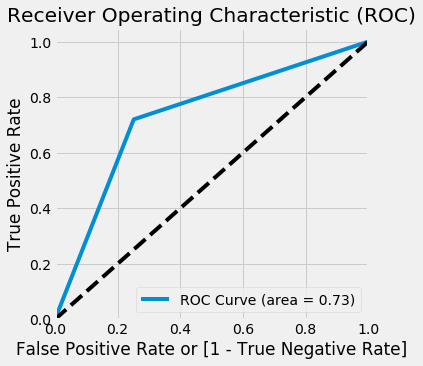

In [226]:
draw_curve(y_test_pred_final['Churn'], y_test_pred_final['Predicted'])